## Lesson 02
### Feature Scaling. Regularization. Stochastic Gradient Descent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# X[0] - intercept (ones)
# X[1] - experience, years
# X[2] - cost per lesson
# X[3] - qualification rate
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
X

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   1,    1,    2,    1,    3,    0,    5,   10,    1,    2],
       [ 500,  700,  750,  600, 1450,  800, 1500, 2000,  450, 1000],
       [   1,    1,    2,    1,    2,    1,    3,    3,    1,    2]])

In [3]:
# Scores (target)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

#### Standardization (Z-score Normalization)

In [4]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [5]:
# Create array for standardized features
X_std = X.copy().astype(np.float64)

X_std[1] = calc_std_feat(X[1]) # standardize experience
X_std[2] = calc_std_feat(X[2]) # standardize cost per lesson
X_std[3] = calc_std_feat(X[3]) # qualification rate

X_std

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [6]:
# MSE (Mean Squared Error)
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [7]:
# GD (Gradient Descent)
def eval_model(X, y, iterations, alpha=1e-4):
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [8]:
# Using GD (not SGD) because the dataset contains few values. For larger datasets, SGD would be more preferable for performance reasons.
eval_model(X_std, y, iterations=1000, alpha=1e-2)

100 [49.75045329  5.10945035  2.70103876  3.80526181] 100.95953020829133
200 [56.38552051  5.30170915  2.50343495  3.84822616] 41.023633968994005
300 [57.26546018  5.44876106  2.32802135  3.87889582] 39.917236902895574
400 [57.38215739  5.5686549   2.18105307  3.9078194 ] 39.86170150617008
500 [57.39763372  5.66660967  2.0579825   3.93449379] 39.8357796059746
600 [57.39968619  5.74677711  1.9549521   3.95866942] 39.81804881517808
700 [57.39995838  5.81249276  1.86871989  3.98029055] 39.80575876125807
800 [57.39999448  5.86644309  1.79656304  3.9994258 ] 39.797228410890575
900 [57.39999927  5.91079685  1.73619609  4.01621932] 39.79130247598976
1000 [57.3999999  5.9473089  1.6857017  4.0308569] 39.78718288874277


array([57.3999999,  5.9473089,  1.6857017,  4.0308569])

#### L2 Regularization (Ridge)

In [9]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    # if i % (iterations / 10) == 0:
      # print(i, W, err)
  return W

In [10]:
eval_model_reg2(X_std, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [11]:
array_lambdas = []
array_x0 = []
array_x1 = []
array_x2 = []
array_x3 = []

for i in range(-5, 2):
    lambda_ = 10 ** i
    weights = eval_model_reg2(X_std, y, iterations=5000, alpha=1e-2, lambda_=lambda_)    
    array_lambdas.append(lambda_)
    array_x0.append(weights[0])
    array_x1.append(weights[1])
    array_x2.append(weights[2])
    array_x3.append(weights[3])

print(array_lambdas)
print(array_x0)
print(array_x1)
print(array_x2)
print(array_x3)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]
[57.399713001434826, 57.39713014349266, 57.37131434282842, 57.11442786069635, 54.66666666666651, 38.26666666666655, 9.56666666666666]
[6.122093942410694, 6.121025153175969, 6.110388032520562, 6.008844204727822, 5.311890097265679, 3.665574783943579, 1.4253053237055897]
[1.4289249895103318, 1.4301203034518344, 1.4420044258394935, 1.5543044302319955, 2.2566081343460462, 2.943526084482351, 1.3522650449138511]
[4.1162060859948495, 4.115874512202113, 4.112578251838318, 4.081447926093954, 3.8810919116787685, 3.252190368053493, 1.3703787291033624]


Text(0, 0.5, 'weight')

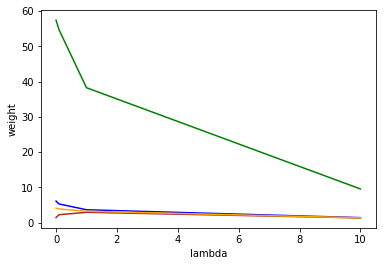

In [12]:
plt.plot(array_lambdas, array_x0, color='green')
plt.plot(array_lambdas, array_x1, color='blue')
plt.plot(array_lambdas, array_x2, color='brown')
plt.plot(array_lambdas, array_x3, color='orange')
plt.xlabel("lambda")
plt.ylabel("weight")